In [2]:
$Version

12.0.1 for Linux x86 (64-bit) (October 16, 2019)

-Graphics-
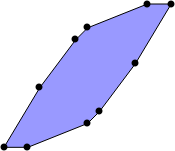

In [13]:
angulars[v_, 
  id_] := {{v, id, ArcTan[v[[1]], v[[2]]]}, {v, -id, 
   ArcTan[-v[[1]], -v[[2]]]}}
buildSectors[a_] := 
 Module[{d = Dimensions[a], n, m, sectors = {}, i, j, la, 
   at = Transpose[a], s, e}, n = d[[1]]; m = d[[2]];
  la = Sort[
    Flatten[Table[angulars[at[[i]], i], {i, 1, m}], 
     1], #1[[3]] < #2[[3]] &];
  (*Print[la];*)
  For[i = 1, i <= m, ++i,
   s = Table[0, {j, 1, m}];
   e = la[[i]];
   s[[ Abs[e[[2]]] ]] = Sign[e[[2]]];
   (*Print[s];*)
   For[j = i + 1, j <= m + i - 1, ++j,
    e = la[[j]];
    s[[ Abs[e[[2]]] ]] = Sign[e[[2]]];
    ];(* For j *)
   (*Print[s];*)
   
   sectors = Join[sectors, {s, -s}]
   (*Print[sectors]*)
   ];(* For i *)
  sectors]
plotPolygonWithLabel[polygon_, label_, 
  fontSize_] := {Polygon[polygon], 
  MapThread[{EdgeForm[Thin], FaceForm[Black], 
     Disk[#1, (fontSize + 12)/72], 
     Text[Style[#2, Black, fontSize, FontFamily -> "Helvetica Bold", 
       Background -> White], #1]} &, {polygon, label}]}
Clear[offsetFunc]
offsetFunc[pts : {Repeated[_List, {3}]}] := 
 Normalize[
  Most[Cross[{0, 0, 1}, 
    Append[Total[Normalize /@ Differences[pts]], 0]]]]

Clear[labeledPolygon]
labeledPolygon[points_, labels_, offset_: 1] := {Polygon@points, 
  Text[Style[#1, Red, Bold], #2[[2]], 
     offset offsetFunc[#2]] & @@@ ({labels, 
      Partition[points, 3, 1, {2, 2}]}\[Transpose])}
plotZonoCheap[a_, c_, b_: 5] := 
 Module[{d = Dimensions[a], s = buildSectors[a], n, m, i, j, k, 
   pts = {}, at = Transpose[a], e},
  n = d[[1]]; m = d[[2]];
  pts = Append[pts, Total[First[s] at] + c]; 
  While[Length[Rest[s]] != 0,
   e = First[s];
   j = 2;
   For[i = 2, i <= Length[s], i++,
    If[Count[MapThread[Equal, {s[[i]], e}], False] == 1,
      j = i;
      Break;
      ];
    ];
   pts = Append[pts, Total[s[[j]] at] + c];
   e = s[[2]];
   s[[2]] = s[[j]];
   s[[j]] = e;
   s = Rest[s];
   ];
  (*Print[pts];*)
  (*labels=Table["*"<>ToString[t],{t,Length@pts}];*)

   (* idx = Range[Length[pts]];*)
  (*idx={"*","*","*","*","*","*","*","*","*","*"};*)
  (*idx={"+-+--",
  "+----","+---+","----+","---++","-+-++","-++++","-+++-","++++-",
  "+++--"};*)
  (*idx={"--+--","-----","----+","---++","-+-++",
  "-++++","-+++-","-++--"};*)
  (*idx={"--+--","-----","----+",
  "---++","--+++","--++-"};*)
  (*idx={"---+-","-----","----+",
  "---++"};*)
 (* Text[Style[#2,Black,20],#1,{0,-1}]&@@@({pts,
  idx}\[Transpose])*)
  (*Graphics[{{Opacity[0],RGBColor[0,0,1/(m-1)],
  EdgeForm[Black],Polygon[pts]},{PointSize[Large],Point[pts]},Text[
  Style[#2,Black,14],#1,{0,-1}]&@@@({pts,idx}\[Transpose]),
  PlotRange->{{-b,b},{-b,b}}}]*)
  
  Graphics[{{Opacity[0.4], Blue, 
     EdgeForm[(*Dashing[0.01],*)Black], Polygon[pts]},{PointSize[
  Large],Black,Point[pts]}, PlotRange -> {{-b, b}, {-b, b}}},
   ImageSize->Scaled[0.4]]
   
  
  ]
  
  plotZonoCheap[{{-3, 5, 2,1,3}, {-4, 2, 0,1,5}}, {20, 10}]

In [23]:
PacletInstall["/home/bibek/Documents/GitLink-2018.07.20.01.paclet"]

Paclet[GitLink, 2018.07.20.01, <>]

In [24]:
PacletFind["GitLink"]

{Paclet[GitLink, 2018.07.20.01, <>]}